In [1]:
# # Requerimientos de librerías:
# !pip install spacy
# !python -m spacy download es_core_news_md

# !pip install transformers
# !pip install transformers scipy ftfy accelerate

# !git clone https://github.com/JorgeSauri/COMSINT.git 

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import tensorflow as tf
import numpy as np
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
from recomendaciones_comsint import Recomendador

c:\Users\jsaur\anaconda3\envs\ENV1\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Con tamaño embeddings 256
- CNN de max 512 kernels (v4)

In [4]:
version = 4

recomendador256 = Recomendador(fuente='recetario_mexicano_small.csv',
                            nutricion = 'nutricion.csv',
                            canasta='canasta_basica.csv')

recomendador256.CargarModelo(emb_size=256, version=version)

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
Modelo Modelos/Modelo_Nut_FV_DistilBERT_04_EMBED-128_CNN.h5 cargado con éxito.


In [48]:
recomendador256.generar_dataset_entrenamiento_nut(df_nutricionales='nutricion.csv', 
                                                  min_ingredientes=5, max_ingredientes=11,
                                                  min_unidades=1, max_unidades=11,
                                                  numero_recetas=1)

Generando 1  recetas aleatorias...



100%|██████████| 1/1 [00:00<00:00, 501.23it/s]


array([['9 gramos de los tazones de microondas gruesos de campbell  sopa de pollo y albóndigas, 4 cucharadas de soja  semillas secas asadas  maduras, 6 piezas de carne de cerdo  estofada  cocinada  separable solo  entera  lomo  fresco, 7 cucharaditas de cordero  asado rápido  cocido  separable delgado y grasa  deshuesado  lomo  importado  nueva zelanda, 6 mililitros de bebidas  enlatado  bebida de uva',
        '1231.32', '0.68', '171.75', '54.95']], dtype='<U395')

In [50]:
recomendador256.NUM_RECETAS = 10000
recomendador256.EMB_SIZE = 256
ITER = 1
INITIAL_EPOCH = 0
EPOCHS = 100

Histories = []
for iteracion in range(ITER):
  MINU = 1 
  MAXU = 11   
  print('\nITERACIÓN:', iteracion+1)
  print('min unidades:',MINU, ' max unidades:', MAXU)
  print('Entrenando desde epoch', INITIAL_EPOCH)
  print('------------------------------------------\n')
  modelo256, history = recomendador256.EntrenarModelo(df_nutricionales='nutricion.csv',
                                #df_training='recipes_con_info_nutricional.csv',
                                df_test='recetas_test.csv', 
                                df_val='recetas_val.csv',
                                learning_rate=1e-4,
                                version=version, 
                                initial_epoch = INITIAL_EPOCH,                             
                                epochs=INITIAL_EPOCH + EPOCHS, 
                                kernels=128,                                             
                                min_ingredientes=5, max_ingredientes=11,
                                min_unidades=MINU, max_unidades=MAXU,                               
                                save=True, verbose=True)
  INITIAL_EPOCH = history.epoch[-1]

  Histories.append(history)



ITERACIÓN: 1
min unidades: 1  max unidades: 11
Entrenando desde epoch 0
------------------------------------------

Error al cargar archivos NumPy.
datasets/numpy/2000_recetas_random_EMBED-128_DATA_X.npy no existe o está corrupto.
datasets/numpy/2000_recetas_random_EMBED-128_DATA_Y.npy no existe o está corrupto.
Generando 2000  recetas aleatorias...



100%|██████████| 2000/2000 [00:03<00:00, 621.81it/s]


Calculando vector de características de 2000 recetas...


  4%|▍         | 81/2000 [04:11<1:38:06,  3.07s/it]

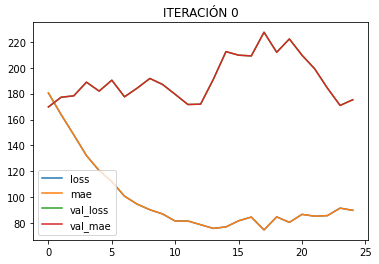

LOSS: 89.82654571533203  -- MAE: 89.82654571533203  -- VAL_LOSS: 175.2900390625  -- VAL_MAE: 175.2900390625
----------------------------------------------------------


In [ ]:
for i in range(len(Histories)):
    history = Histories[i]    
    pd.DataFrame(history.history).plot()
    plt.title('ITERACIÓN ' + str(i))
    plt.show()
    print('LOSS:',history.history['loss'][-1], ' -- MAE:', history.history['mae'][-1], 
          ' -- VAL_LOSS:', history.history['val_loss'][-1], ' -- VAL_MAE:', history.history['val_mae'][-1])
    print('----------------------------------------------------------')

In [ ]:
modelo256, history2 = recomendador128.EntrenarModelo(df_nutricionales='nutricion.csv',
                            df_training='recipes_con_info_nutricional.csv',
                            df_test='recetas_test.csv', 
                            df_val='recetas_val.csv',
                            learning_rate=1e-4,
                            version=version, 
                            initial_epoch = INITIAL_EPOCH,                             
                            epochs=INITIAL_EPOCH + EPOCHS, 
                            kernels=128,                                             
                            min_ingredientes=5, max_ingredientes=11,
                            min_unidades=MINU, max_unidades=MAXU,                               
                            save=True, verbose=True)

Histories.append(history)

In [ ]:
for i in range(len(Histories)):
    history = Histories[i]    
    pd.DataFrame(history.history).plot()
    plt.title('ITERACIÓN ' + str(i))
    plt.show()
    print('LOSS:',history.history['loss'][-1], ' -- MAE:', history.history['mae'][-1], 
          ' -- VAL_LOSS:', history.history['val_loss'][-1], ' -- VAL_MAE:', history.history['val_mae'][-1])
    print('----------------------------------------------------------')